# Sparse Logistic SVD: User Guide

## Setup

In [1]:
import slsvd
import numpy as np

print(slsvd.__version__)

0.1.0


In [2]:
import matplotlib.pyplot as plt

## Data Generation

In [3]:
from slsvd.data_generation import generate_data

In [87]:
bin_mat, loadings, scores, diagonal=generate_data(n=100, d=50, rank=2, random_seed=123)

In [88]:
bin_mat.shape

(100, 50)

In [89]:
loadings.shape

(50, 2)

In [90]:
scores.shape

(100, 2)

In [8]:
np.dot(loadings.T, loadings)

array([[1., 0.],
       [0., 1.]])

In [9]:
np.dot(scores.T, scores)

array([[ 97.96727037,   6.76145461],
       [  6.76145461, 123.53743602]])

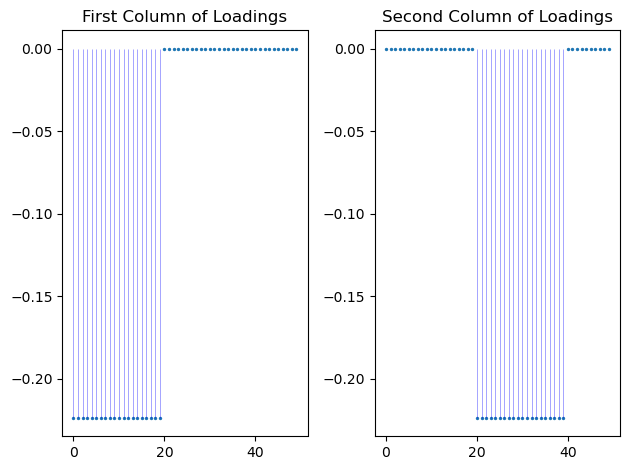

In [91]:
import matplotlib.pyplot as plt

# Plotting the first column
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)  # Adjust the size parameter
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5, linewidth=0.5)  # Adjust the line width
plt.title('First Column of Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)  # Adjust the size parameter
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5, linewidth=0.5)  # Adjust the line width
plt.title('Second Column of Loadings')

plt.tight_layout()
plt.show()


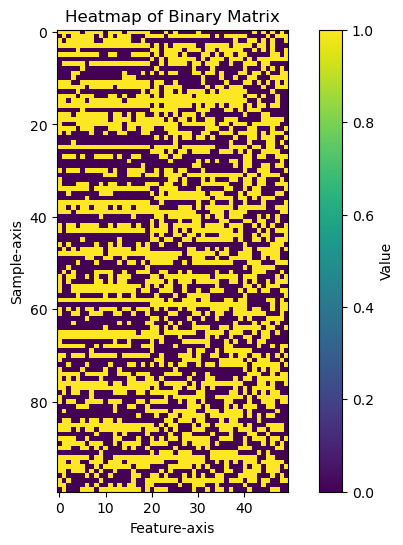

In [93]:
#import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(bin_mat, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of Binary Matrix')
plt.xlabel('Feature-axis')
plt.ylabel('Sample-axis')
plt.show()

## Sparse Logistic SVD

In [12]:
from slsvd.slsvd import sparse_logistic_pca

In [13]:
from slsvd.sparse_logistic_pca import sparse_logistic_pca

In [14]:
from slsvd.sparse_logistic_pca import sparse_logistic_pca_coord

In [15]:
#mu, A, B, zeros, BIC, m, loss, lambdas = sparse_logistic_pca(bin_mat, lambda_val=0.1, k=2, procrustes=False, lasso=False)

In [94]:
bin_mat.shape

(100, 50)

In [95]:
thelam=np.logspace(0, 5, num=5)

In [96]:
thelam

array([1.00000000e+00, 1.77827941e+01, 3.16227766e+02, 5.62341325e+03,
       1.00000000e+05])

In [97]:
mu, A, B, zeros, BIC, m,  lambda_val=sparse_logistic_pca_coord(bin_mat, lambdas=thelam) 

In [17]:
#mu, A, B, zeros, BIC, m, lambda_val= sparse_logistic_pca(bin_mat, lambda_val=0.01, k=2, procrustes=False, lasso=False)

In [98]:
lambda_val

100000.0

In [82]:
m

1

In [74]:
BIC

6449.587045359075

In [42]:
bin_mat.shape

(100, 50)

In [43]:
mu.shape

(50,)

In [83]:
np.mean(mu)

0.0426771627816993

In [84]:
A.shape

(10, 2)

In [85]:
B.shape

(10, 2)

In [47]:
zeros

24

In [48]:
np.count_nonzero(A != 0)

200

In [102]:
np.count_nonzero(B[:,0] != 0)

42

In [100]:
np.count_nonzero(B[:,1] != 0)

34

In [99]:
np.dot(B.T, B)

array([[1.        , 0.01707662],
       [0.01707662, 1.        ]])

In [54]:
np.dot(A.T, A)

array([[4166.79280819,   13.66255009],
       [  13.66255009, 2089.55865952]])

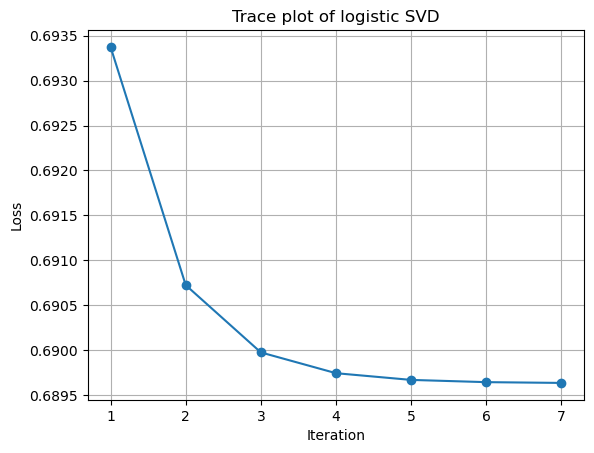

In [27]:
iterations = np.arange(1, len(loss) + 1)

# Plot loss values against iteration numbers
plt.plot(iterations, loss, marker='o', linestyle='-')
plt.title('Trace plot of logistic SVD')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Visualization

In [28]:
from sklearn.decomposition import PCA

### PCA Visualization

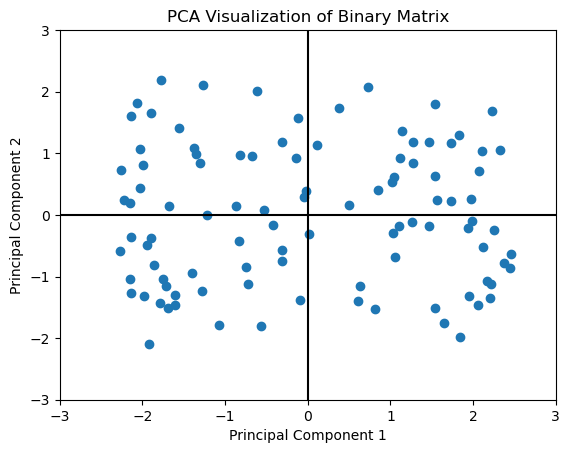

In [29]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bin_mat)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Visualization of Binary Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### SVD Visualization

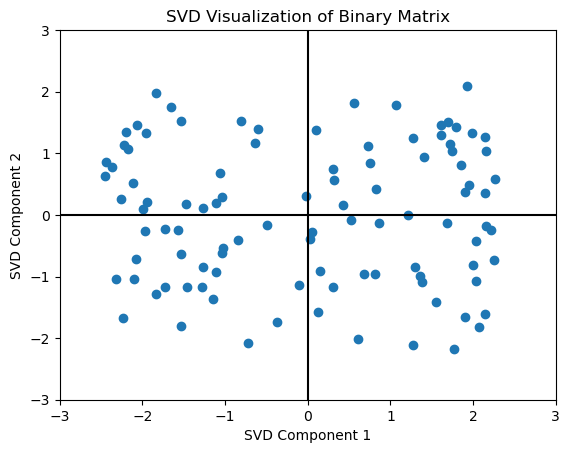

In [62]:
bin_mat_c = bin_mat - np.mean(bin_mat, axis=0)

# Step 2: Perform SVD on the centered matrix
U, S, Vt = np.linalg.svd(bin_mat_c, full_matrices=False)


# Take the first two components
svd_result = U[:, :2] * S[:2]

# Visualize SVD results
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.title('SVD Visualization of Binary Matrix')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### Sparse Logistic PCA Visualization

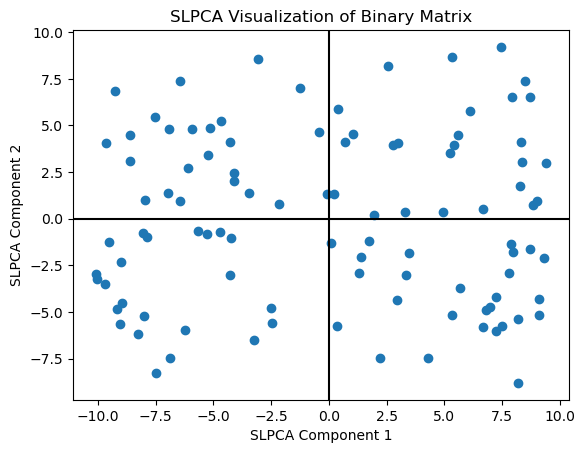

In [61]:
slpca_result=A
plt.scatter(slpca_result[:, 0], slpca_result[:, 1])
plt.title('SLPCA Visualization of Binary Matrix')
plt.xlabel('SLPCA Component 1')
plt.ylabel('SLPCA Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.show()

### Visualization of Loadings

In [60]:
loadings.shape

(50, 2)

In [59]:
B.shape

(50, 2)

In [58]:
np.dot(loadings.T, loadings)

array([[1., 0.],
       [0., 1.]])

In [57]:
np.dot(B.T, B)

array([[1.        , 0.01707662],
       [0.01707662, 1.        ]])

In [56]:
np.dot(scores.T, scores)

array([[ 97.96727037,   6.76145461],
       [  6.76145461, 123.53743602]])

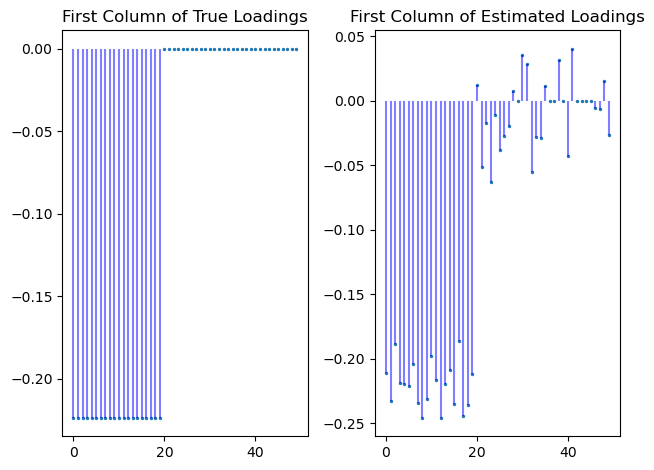

In [103]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('First Column of True Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 0])), B[:, 0], s=2)
for i, val in enumerate(B[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('First Column of Estimated Loadings')

plt.tight_layout()
plt.show()

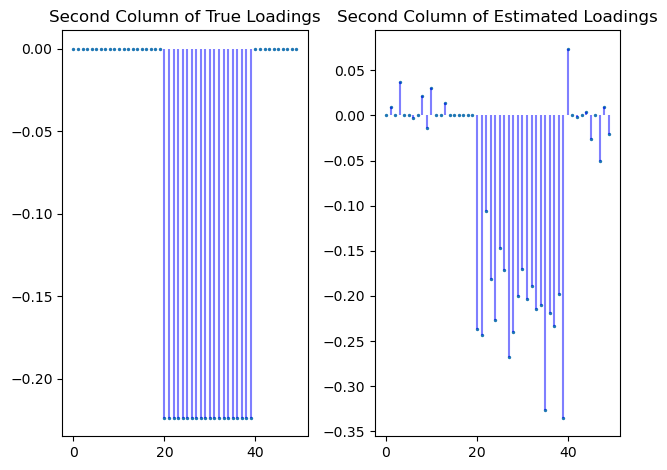

In [104]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Second Column of True Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), B[:, 1], s=2)
for i, val in enumerate(B[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Second Column of Estimated Loadings')

plt.tight_layout()
plt.show()

In [105]:
B[:, 1]

array([ 0.        ,  0.00925399,  0.        ,  0.03659424, -0.        ,
        0.        , -0.00265842, -0.        ,  0.02161363, -0.01399504,
        0.03012054, -0.        , -0.        ,  0.01410889,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.23624038, -0.24387326, -0.10633541, -0.18126653, -0.22624813,
       -0.14741999, -0.1709983 , -0.26755583, -0.23957391, -0.20054461,
       -0.16993938, -0.20375967, -0.1894148 , -0.21443689, -0.21063842,
       -0.32638515, -0.21852222, -0.23314508, -0.1979127 , -0.33513926,
        0.07387308,  0.        , -0.00219493, -0.        ,  0.00377345,
       -0.02665212,  0.        , -0.05020079,  0.0092867 , -0.02110642])

# Reference

Lee, S., Huang, J. Z., & Hu, J. (2010). Sparse logistic principal components analysis for binary data. The Annals of Applied Statistics, 4(3), 1579.